In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/Nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='Nanum')
matplotlib.font_manager._rebuild()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체
print(device)

cuda:0


In [3]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
car_dir = './class_1st/train'
categories = os.listdir(car_dir)
nb_classes = len(categories)
categories

['현대 코나',
 '쌍용 렉스턴 스포츠',
 '현대 코나 일렉트릭',
 '르노삼성 SM6',
 '기아 K7 하이브리드 YG',
 '현대 싼타페TM',
 '제네시스 G80',
 '기아 니로',
 '기아 레이',
 '현대 팰리 세이드',
 '현대 그랜저 하이브리드 IG',
 '기아 K7 YG',
 '기아 봉고3',
 '제네시스 G90',
 '현대 그랜저 IG',
 '쌍용 G4 렉스턴',
 '기아 셀토스',
 '현대 코나 하이브리드',
 '기아 모하비',
 '현대 그랜드 스타렉스',
 '현대 포터2',
 '쉐보레 트랙스',
 '기아 모닝 JA',
 '현대 LF 쏘나타',
 '기아 카니발',
 '기아 쏘렌토',
 '기아 K5 JF',
 '쉐보레 스파크',
 '르노삼성 QM3',
 '기아 K3 BD',
 '쌍용 티볼리',
 '르노삼성 QM6',
 '.DS_Store',
 '현대 베뉴']

In [38]:
# 이미지 크기 지정
image_w = 224
image_h = 224
pixels = image_w * image_h *3

In [39]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# transforms_val = transforms.Compose([
#     transforms.Resize((380, 380), Image.ANTIALIAS),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
data_dir = './class_1st'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)
# val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'val'), transforms_val)


train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=64, shuffle=True, num_workers=4)
# val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=12, shuffle=True, num_workers=4)

class_names = train_datasets.classes
class_cnt = len(class_names)


print('학습 데이터셋 크기:', len(train_datasets))
print('차종 모델명 :', class_names)
print('차종 개수 : ', class_cnt )

학습 데이터셋 크기: 5035
차종 모델명 : ['기아 K3 BD', '기아 K5 JF', '기아 K7 YG', '기아 K7 하이브리드 YG', '기아 니로', '기아 레이', '기아 모닝 JA', '기아 모하비', '기아 봉고3', '기아 셀토스', '기아 쏘렌토', '기아 카니발', '르노삼성 QM3', '르노삼성 QM6', '르노삼성 SM6', '쉐보레 스파크', '쉐보레 트랙스', '쌍용 G4 렉스턴', '쌍용 렉스턴 스포츠', '쌍용 티볼리', '제네시스 G80', '제네시스 G90', '현대 LF 쏘나타', '현대 그랜드 스타렉스', '현대 그랜저 IG', '현대 그랜저 하이브리드 IG', '현대 베뉴', '현대 싼타페TM', '현대 코나', '현대 코나 일렉트릭', '현대 코나 하이브리드', '현대 팰리 세이드', '현대 포터2']
차종 개수 :  33


In [40]:
model = models.resnet34(pretrained=True)

In [41]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
# model = models.efficientnetb0(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 6개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, class_cnt)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [43]:
num_epochs = 10
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 3.1913 Acc: 15.2532% Time: 14.0901s
#1 Loss: 2.1939 Acc: 47.1897% Time: 28.1723s
#2 Loss: 1.4391 Acc: 66.5938% Time: 42.2676s
#3 Loss: 1.0053 Acc: 76.3853% Time: 56.3253s
#4 Loss: 0.7415 Acc: 82.1847% Time: 70.4318s
#5 Loss: 0.5709 Acc: 86.4548% Time: 84.5315s
#6 Loss: 0.4420 Acc: 89.4737% Time: 98.6123s
#7 Loss: 0.3534 Acc: 91.8769% Time: 112.6792s
#8 Loss: 0.2871 Acc: 93.2870% Time: 126.8536s
#9 Loss: 0.2357 Acc: 94.8163% Time: 140.9986s


In [55]:
num_epochs = 5
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 0.0570 Acc: 98.4508% Time: 14.1215s
#1 Loss: 0.0608 Acc: 98.0338% Time: 28.2330s
#2 Loss: 0.0548 Acc: 98.3913% Time: 42.3382s
#3 Loss: 0.0475 Acc: 98.5700% Time: 56.4315s
#4 Loss: 0.0524 Acc: 98.3118% Time: 70.5128s


In [56]:
# 모델 저장
torch.save(model, './models/car_resnet34_ver01_25.ph')

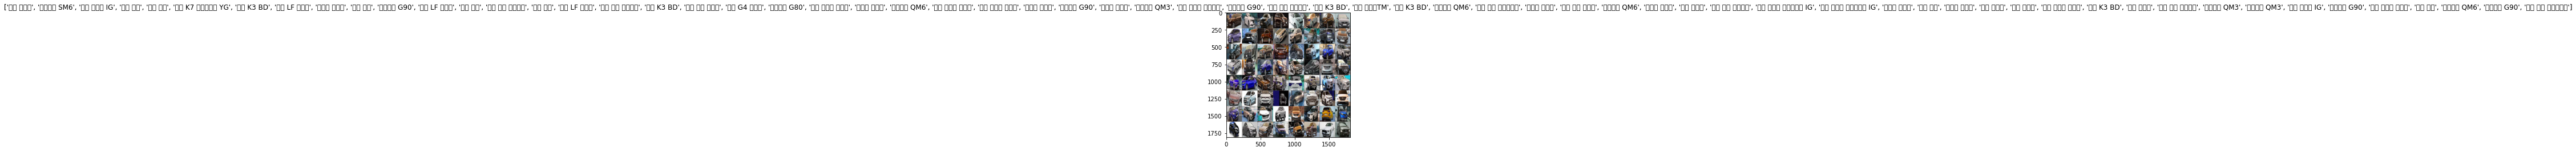

In [57]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

[예측 결과: 쌍용 렉스턴 스포츠] (실제 정답: 쌍용 렉스턴 스포츠)


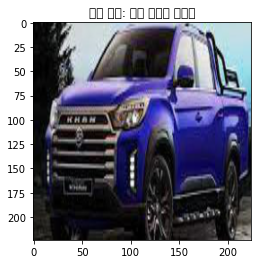

[예측 결과: 현대 팰리 세이드] (실제 정답: 현대 팰리 세이드)


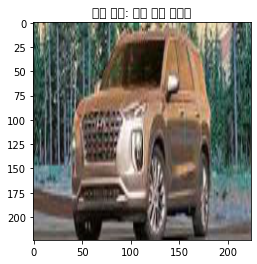

[예측 결과: 현대 그랜저 IG] (실제 정답: 현대 그랜저 IG)


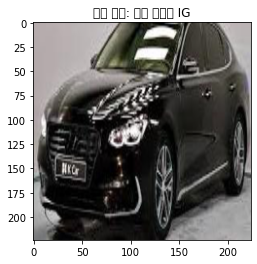

[예측 결과: 현대 그랜저 하이브리드 IG] (실제 정답: 현대 그랜저 하이브리드 IG)


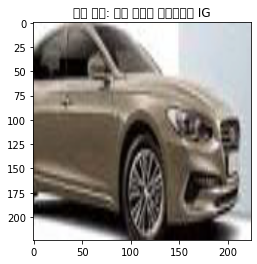

[예측 결과: 기아 셀토스] (실제 정답: 기아 셀토스)


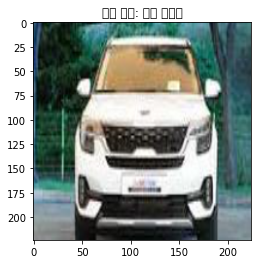

[예측 결과: 기아 니로] (실제 정답: 기아 니로)


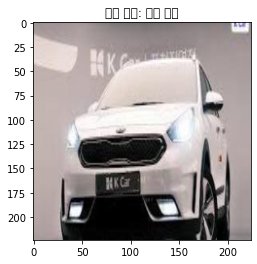

[예측 결과: 쉐보레 트랙스] (실제 정답: 쉐보레 트랙스)


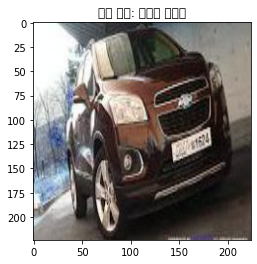

[예측 결과: 현대 LF 쏘나타] (실제 정답: 현대 LF 쏘나타)


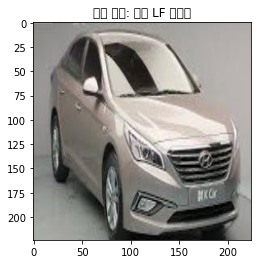

[예측 결과: 기아 니로] (실제 정답: 기아 니로)


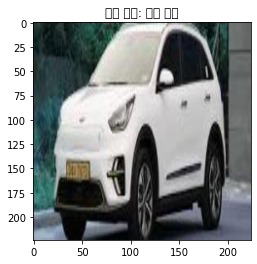

[예측 결과: 현대 LF 쏘나타] (실제 정답: 현대 LF 쏘나타)


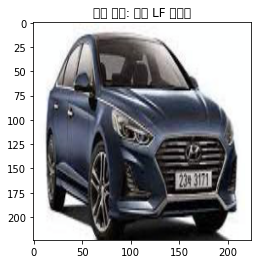

[예측 결과: 르노삼성 QM6] (실제 정답: 쌍용 G4 렉스턴)


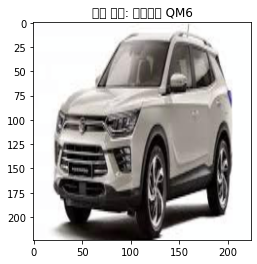

[예측 결과: 제네시스 G90] (실제 정답: 제네시스 G90)


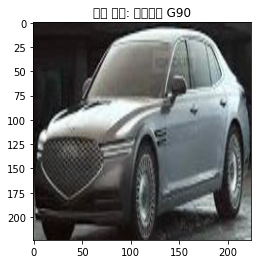

[예측 결과: 제네시스 G80] (실제 정답: 제네시스 G80)


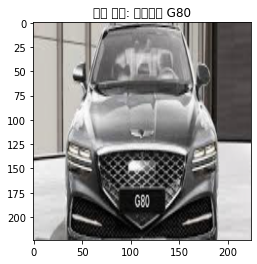

[예측 결과: 기아 모하비] (실제 정답: 기아 모하비)


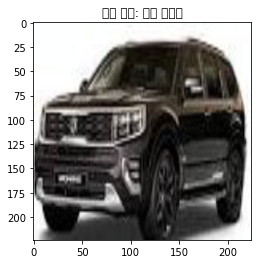

[예측 결과: 기아 모하비] (실제 정답: 기아 모하비)


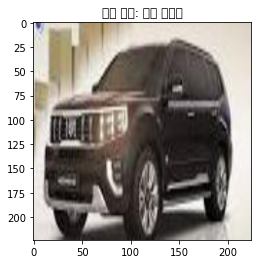

[예측 결과: 르노삼성 QM6] (실제 정답: 르노삼성 QM6)


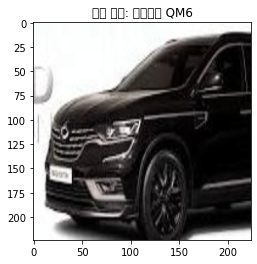

[예측 결과: 기아 니로] (실제 정답: 기아 K3 BD)


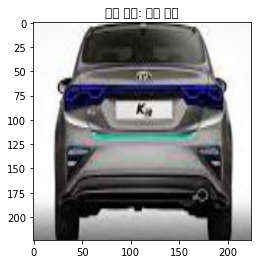

[예측 결과: 기아 K7 YG] (실제 정답: 기아 K7 하이브리드 YG)


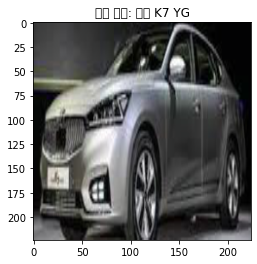

[예측 결과: 기아 셀토스] (실제 정답: 기아 셀토스)


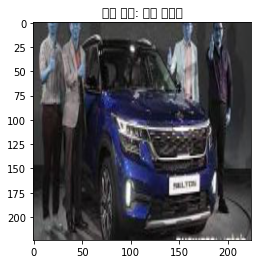

[Test Phase] Loss: 0.6708 Acc: 79.8013% Time: 5.0903s


In [58]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))